In [1]:
import tensorflow as tf
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
def array2one_hot(arr):
    """
     arr: type []
    """
    count = len(arr)
    
    b = np.zeros((count, 10))
    
    for i in range(count):
        b[i, arr[i]] = 1
    return b

In [3]:
scaler = StandardScaler()
mnist_train = pd.read_csv('train.csv')
# 取出label并转换成narray
mnist_y_train = mnist_train['label'].values

x_train = mnist_train[['pixel' + str(idx) for idx in range(784)]][:30000]

# 因为PrettyTensor只支持16位和32位，归一化返回的数据类型是64位的，所以要转换成32位
train_images = scaler.fit_transform(x_train).astype('float32')

train_labels_cls = mnist_y_train[:30000]
train_labels = array2one_hot(train_labels_cls)

In [4]:
x_dev = mnist_train[['pixel' + str(idx) for idx in range(784)]][30000:42000]
dev_images = scaler.fit_transform(x_dev).astype('float32')

dev_labels_cls = mnist_y_train[30000:42000]
dev_labels = array2one_hot(dev_labels_cls)

In [5]:
def plot_image(images, cls_sample ):
    """
    @param 
    """
    assert len(images) == len(cls_sample)
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3,3)
    
    for i, ax in enumerate(axes.flat):
        # Plot image
        ax.imshow(images[i].reshape((28 , 28)), cmap='binary')
        
        xlabel = "True: {0}".format(cls_sample[i])
        
        ax.set_xlabel(xlabel)
        
        # remove ticks
        ax.set_xticks([])
        ax.set_yticks([])

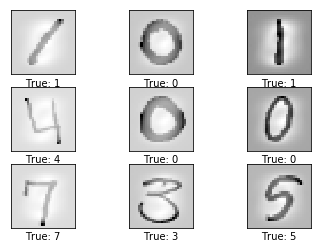

In [6]:
plot_image(train_images[0:9], train_labels_cls[0:9])

In [7]:
img_size = 28

img_size_flat = img_size * img_size

img_shape = (img_size, img_size)

num_channels = 1

num_classes = 10

In [8]:
x = tf.placeholder(tf.float32, [None, img_size_flat], name='x')

x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

y_true = tf.placeholder(tf.float32, [None, num_classes], name='y_true')

y_true_cls = tf.argmax(y_true, dimension=1)

In [9]:
import prettytensor as pt
x_pretty = pt.wrap(x_image)

In [10]:
with pt.defaults_scope(activation_fn=tf.nn.relu):
    
    y_pred, loss = x_pretty.\
        conv2d(kernel=5, depth=16, name='layer_conv1').\
        max_pool(kernel=2, stride=2).\
        conv2d(kernel=5, depth=36, name='layer_conv2').\
        flatten().\
        fully_connected(size=128, name='layer_fc1').\
        softmax_classifier(num_classes=num_classes, labels=y_true)

一些观察模型变化的方法

In [11]:
# 获取该层的权值
def get_weights_variable(layer_name):
    
    with tf.variable_scope(layer_name, reuse=True):
        variable = tf.get_variable('weights')
    return variable

In [12]:
weights_conv1 = get_weights_variable(layer_name='layer_conv1')
weights_conv2 = get_weights_variable(layer_name='layer_conv2')

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

In [14]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [15]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [16]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
# compute
session = tf.Session()

session.run(tf.global_variables_initializer())

In [24]:
import time
from datetime import timedelta

train_batch_size = 64

total_iterations = 0

def optimize(num_iterations):
    
    global total_iterations
    
    start_time = time.time()
    
    left = 0
    
    for i in range(total_iterations, total_iterations + num_iterations):
        
        x_batch, y_true_batch = train_images[left:left + train_batch_size], train_labels[left:left + train_batch_size]
        
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}
        
        session.run(optimizer, feed_dict=feed_dict_train)
        
        if i % 100 == 0:
            acc = session.run(accuracy, feed_dict=feed_dict_train)
            
            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"
            
            print(msg.format(i + 1, acc))
        
        left += train_batch_size
    total_iterations += num_iterations
    
    end_time = time.time()
    
    time_diff = end_time - start_time
    
    print("Time useage: " + str(timedelta(seconds=int(round(time_diff)))))

In [25]:
optimize(num_iterations=500)

Optimization Iteration:      1, Training Accuracy:  18.8%
Optimization Iteration:    101, Training Accuracy:  98.4%
Optimization Iteration:    201, Training Accuracy:  92.2%
Optimization Iteration:    301, Training Accuracy:  98.4%
Optimization Iteration:    401, Training Accuracy:  95.3%
Time useage: 0:00:58


In [26]:
mnist_test = pd.read_csv('test.csv')

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
x_test = mnist_test[['pixel' + str(idx) for idx in range(784)]]

test_images = scaler.fit_transform(x_test).astype('float32')


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [28]:
acc = session.run(y_pred_cls, feed_dict={x: test_images})
acc

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [30]:
pd.DataFrame({"ImageId": range(1, len(test_images) + 1), "Label": acc}).to_csv('C.csv', index=False)